# Lab05 Python Data Science with Pandas

In [3]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [4]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [5]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df_1 = df [['city','country']]
df_1.head()

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [6]:
# Q2: how to get the first 5 rows of the "city" column?
df.city[:5]

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [7]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2]

lat                 51.4782
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [8]:
# Q4: how to use .loc to select the first row in "country" column?
df.country.loc[0]

'United Kingdom'

In [9]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df.loc[3,['city', 'date']]

city            Hounslow
date    05/14/2014 11:24
Name: 3, dtype: object

### Using .iloc[ ]

In [10]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[[3],[2]]

,date
3,05/14/2014 11:24


In [11]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[300::300]

,lat,lon,date,city,country
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [12]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [13]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['city']=='Munich'

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [14]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it.
not_barcelona = df[(df['country']=='Spain') & ~(df['city']=='Barcelona')]
not_barcelona.head()

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain


In [15]:
# Q11: select rows where either the city is munich, or the country is serbia
munich_serbia = df[(df['country']=='Serbia') | (df['city']=='Munich')]
munich_serbia.head()

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [16]:
# Q12: how many observations are west of the prime meridian?
len(df[df['lon'] < 0])

24

In [17]:
# Q13: get all rows that contain a city that starts with the letter G
df[df['city'].str.startswith('G')]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [18]:
# Q14: how many unique cities and countries in the dataset? 
unique_city = df['city'].unique()
unique_country = df['country'].unique()
len(unique_city) + len(unique_country)

106

In [19]:
# Also can you check missing values for the datafram
df.isnull()

,lat,lon,date,city,country
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
173,False,False,False,False,False
174,False,False,False,False,False
175,False,False,False,False,False
176,False,False,False,False,False


In [20]:
# Q15: group by country name and show the city names in each of the country
group = df.groupby('country')
group['country','city'].head()

<ipython-input-20-44f5fa369e85>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group['country','city'].head()


,country,city
0,United Kingdom,West Drayton
1,Portugal,Lisbon
2,Portugal,Lisbon
3,Portugal,Lisbon
4,Portugal,Lisbon
5,Portugal,Lisbon
24,Spain,El Prat de Llobregat
25,Spain,Viladecans
26,Spain,Barcelona
27,Spain,Barcelona


## Part 3 <br /> How to select based on a date-time values

In [21]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [22]:
# Q16: is the timestamp index unique? How can you use code to find it? 
dt.index.is_unique

False

In [23]:
# Q17: drop duplicate index 
dt.drop_duplicates(inplace=True)

In [30]:
# Q18: create a weekday and a weekend dataframe
weekends = dt[(dt.index.weekday==6) | (dt.index.weekday==0)]
weekdays = dt[~(dt.index.weekday==6) | (dt.index.weekday==0)]

<AxesSubplot:title={'center':'Number of observations each day of the week has'}>

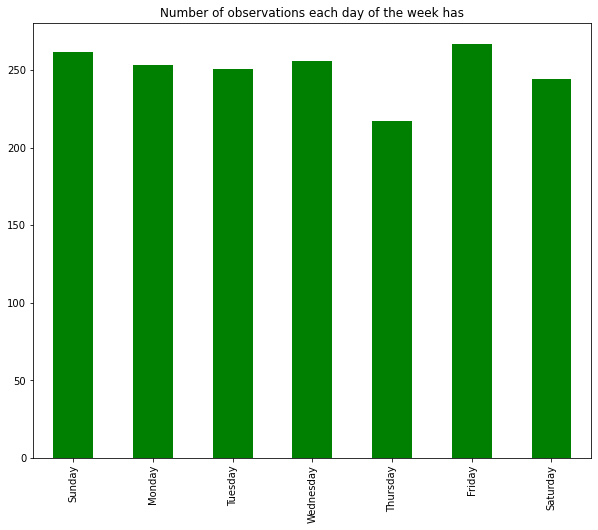

In [40]:
# Q19: calculate and plot the number of observations each day of the week has
observations = dt.groupby(dt.index.weekday).size()
observations.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
observations.plot(figsize=[10, 8], kind='bar', color='g', title='Number of observations each day of the week has')

# 